# Challenge: Make your own regression model

Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_excel('./data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [3]:
df = df.set_index('City')
df.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,
Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [4]:
df.columns

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
df = df.drop(['Violent\ncrime', 'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2', 
         'Aggravated\nassault', 'Burglary', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'], axis=1)
df.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
City,,,,
Adams Village,1861.0,0.0,0.0,12.0
Addison Town and Village,2577.0,0.0,0.0,24.0
Akron Village,2846.0,0.0,0.0,16.0
Albany,97956.0,8.0,227.0,4090.0
Albion Village,6388.0,0.0,4.0,223.0


In [6]:
df = df.rename(index=str, columns={'Population':'Pop', 'Murder and\nnonnegligent\nmanslaughter':'Murder', 
                                  'Property\ncrime':'Prop'})
df.head()

,Pop,Murder,Robbery,Prop
City,,,,
Adams Village,1861.0,0.0,0.0,12.0
Addison Town and Village,2577.0,0.0,0.0,24.0
Akron Village,2846.0,0.0,0.0,16.0
Albany,97956.0,8.0,227.0,4090.0
Albion Village,6388.0,0.0,4.0,223.0


In [7]:
df.isnull().sum()

Pop        3
Murder     3
Robbery    3
Prop       3
dtype: int64

In [8]:
df = df.dropna(axis=0)
df.head()

,Pop,Murder,Robbery,Prop
City,,,,
Adams Village,1861.0,0.0,0.0,12.0
Addison Town and Village,2577.0,0.0,0.0,24.0
Akron Village,2846.0,0.0,0.0,16.0
Albany,97956.0,8.0,227.0,4090.0
Albion Village,6388.0,0.0,4.0,223.0


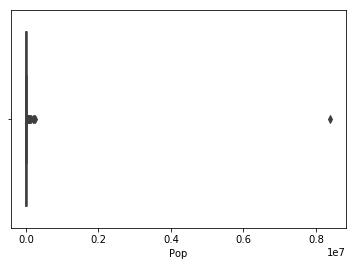

In [9]:
sns.boxplot(x='Pop', data=df)
plt.show()

In [10]:
df.Pop.idxmax()

'New York'

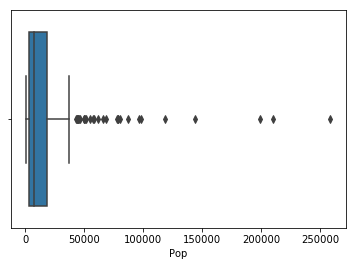

In [11]:
df = df.drop('New York')

sns.boxplot(x='Pop', data=df)
plt.show()

In [59]:
df['Pop_Sq'] = df['Pop']**2
df['Murder_Cat'] = np.where(df['Murder']>0, 1, 0)
df['Roberry_Cat'] = np.where(df['Robbery']>0, 1, 0)
df['Pop_Sqrt'] = np.sqrt(df['Pop'])
df['Pop_Log'] = np.log(df['Pop'])

df['Murder_Sqrt'] = np.sqrt(df['Murder'])
df['Roberry_Sqrt'] = np.sqrt(df['Robbery'])

df['Murder_Log'] = np.log(1 + df['Murder'])
df['Roberry_Log'] = np.log(1+ df['Robbery'])


df['Prop_Log'] = np.log(1 + df['Prop'])

df.head()

,Pop,Murder,Robbery,Prop,Pop_Sq,Murder_Cat,Roberry_Cat,Prop_Log,Pop_Sqrt,Murder_Sqrt,Roberry_Sqrt,Pop_Log,Murder_Log,Roberry_Log
City,,,,,,,,,,,,,,
Adams Village,1861.0,0.0,0.0,12.0,3.463321e+06,0,0,2.564949,43.139309,0.000000,0.000000,7.528869,0.000000,0.000000
Addison Town and Village,2577.0,0.0,0.0,24.0,6.640929e+06,0,0,3.218876,50.764161,0.000000,0.000000,7.854381,0.000000,0.000000
Akron Village,2846.0,0.0,0.0,16.0,8.099716e+06,0,0,2.833213,53.347915,0.000000,0.000000,7.953670,0.000000,0.000000
Albany,97956.0,8.0,227.0,4090.0,9.595378e+09,1,1,8.316545,312.979233,2.828427,15.066519,11.492274,2.197225,5.429346
Albion Village,6388.0,0.0,4.0,223.0,4.080654e+07,0,1,5.411646,79.924965,0.000000,2.000000,8.762177,0.000000,1.609438


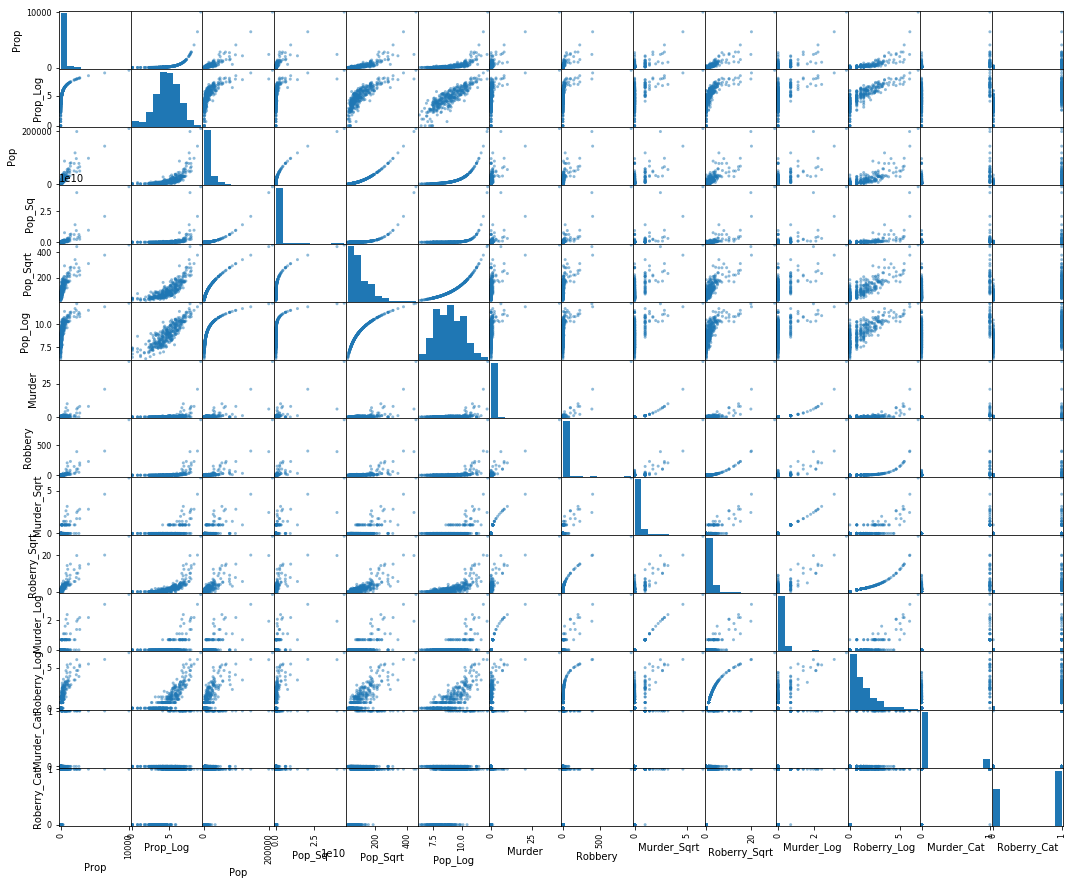

In [63]:
pd.plotting.scatter_matrix(df[['Prop', 'Prop_Log',
                               'Pop', 'Pop_Sq', 'Pop_Sqrt', 'Pop_Log',
                               'Murder', 'Robbery', 'Murder_Sqrt', 'Roberry_Sqrt', 'Murder_Log', 'Roberry_Log',
                               'Murder_Cat','Roberry_Cat']], 
                           figsize=(18,15))
plt.show()

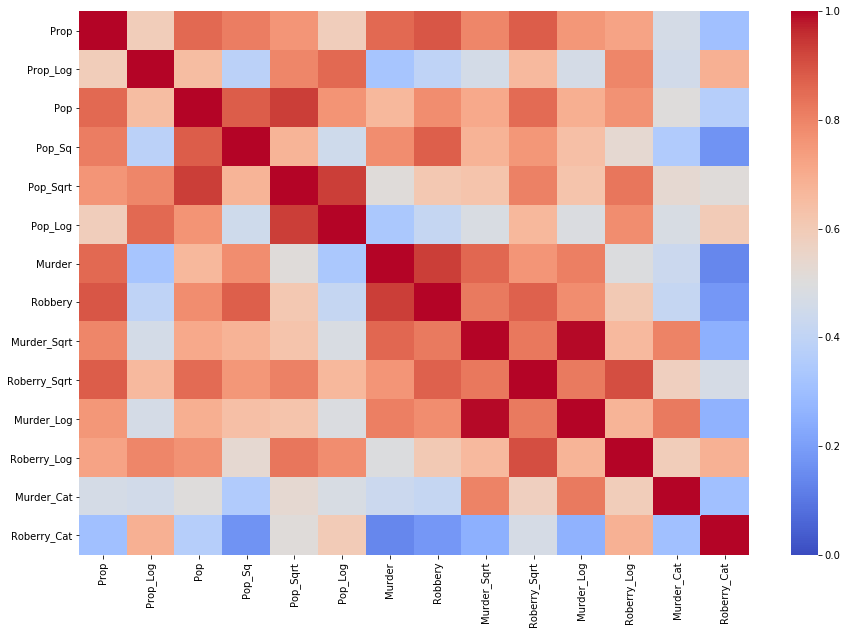

In [64]:
plt.subplots(figsize=(15,10))
sns.heatmap(df[['Prop', 'Prop_Log',
                'Pop', 'Pop_Sq', 'Pop_Sqrt', 'Pop_Log', 
                'Murder', 'Robbery', 'Murder_Sqrt', 'Roberry_Sqrt', 'Murder_Log', 'Roberry_Log', 
                'Murder_Cat','Roberry_Cat']].corr(),
           cmap ='coolwarm', vmin=0., vmax=1.)
plt.show()

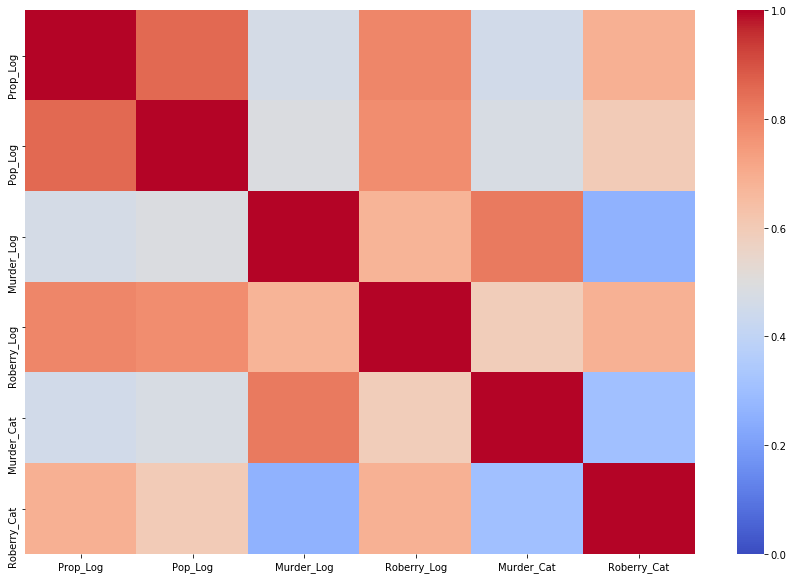

In [65]:
plt.subplots(figsize=(15,10))
sns.heatmap(df[['Prop_Log',
                'Pop_Log', 
                'Murder_Log', 'Roberry_Log', 
                'Murder_Cat','Roberry_Cat']].corr(),
           cmap ='coolwarm', vmin=0., vmax=1.)
plt.show()


Coefficients: 
 [  2.34840519e-02  -8.72371499e-08   1.24686353e+02   4.10807981e+00
  -1.69415490e+02   3.79253497e+01]

Intercept: 
 -54.447798212

R-squared:
0.904986106613


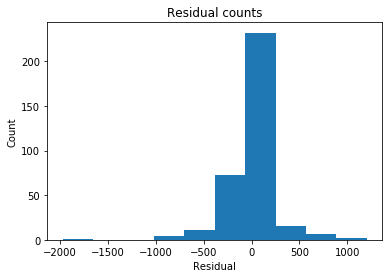

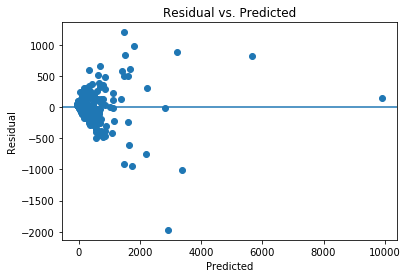

In [48]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Prop']
X = df[['Pop', 'Pop_Sq', 'Murder', 'Robbery', 'Murder_Cat', 'Roberry_Cat']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


Coefficients: 
 [ 0.80098872 -0.05996975  0.26370046  0.02125066  0.64863641]

Intercept: 
 -3.13198192634

R-squared:
0.798324190803


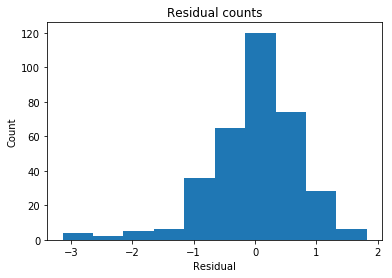

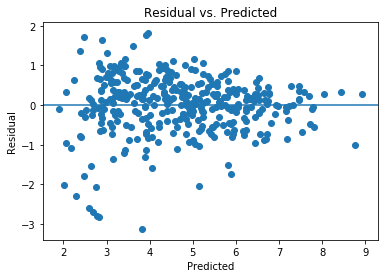

In [66]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Prop_Log']
X = df[['Pop_Log', 'Murder_Log', 'Roberry_Log', 'Murder_Cat','Roberry_Cat']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


Coefficients: 
 [  1.41995969e-04  -2.71477725e-10  -6.49011833e-02   2.37872696e+00
   1.80514602e-01   2.99463023e-03  -2.04027691e+00  -1.17917593e-01
   1.54961364e+00   5.67619205e-01   8.06322820e-01   4.48937546e-01]

Intercept: 
 -12.498390691

R-squared:
0.81164430451


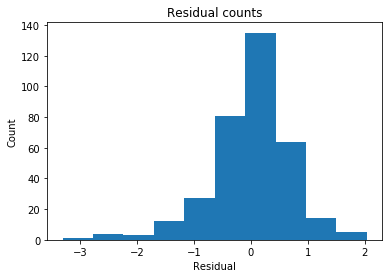

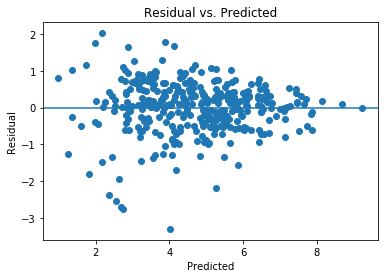

In [67]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Prop_Log']
X = df[['Pop', 'Pop_Sq', 'Pop_Sqrt', 'Pop_Log', 
        'Murder', 'Robbery', 'Murder_Sqrt', 'Roberry_Sqrt', 'Murder_Log', 'Roberry_Log', 
        'Murder_Cat','Roberry_Cat']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()